# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/tidal_wetland_estuaries.csv')

# Replace the -9999 values in the dataframe with null
df = df.replace(-9999, np.NaN)
# Get rid of all the rows with null values from the relevant columns
df = df.loc[(df["coast"].notnull()) & (df['soc_density'].notnull()), :]

In [3]:
# Subset the dataframe with all rows where the data is from the west coast
west = df.loc[(df['coast'] == 'WEST'),:]

# Subset the dataframe with all rows where the data is from the east coast
east = df.loc[(df['coast'] == 'EAST'),:]

In [4]:

stats.ttest_ind(east['soc_density'], west['soc_density'], alternative='greater', nan_policy='omit')

Ttest_indResult(statistic=8.45031778669312, pvalue=5.765284478012742e-13)

Defend your choice of which type of t-test you used (3 pt).

I used a two sample one tailed t-test. I used a two sample t-test because I wanted to determine if the true means of two groups, the East coast and the West coast, were different. I used a one tailed t-test becasue they hypothesis was that soil organic carbon density is larger in the East coast than in the West coast. So, I did a one tailed t-test to test whether the mean of East coast was greater than the mean of West coast instead of just testing if they were different from each other.

<function matplotlib.pyplot.show(close=None, block=None)>

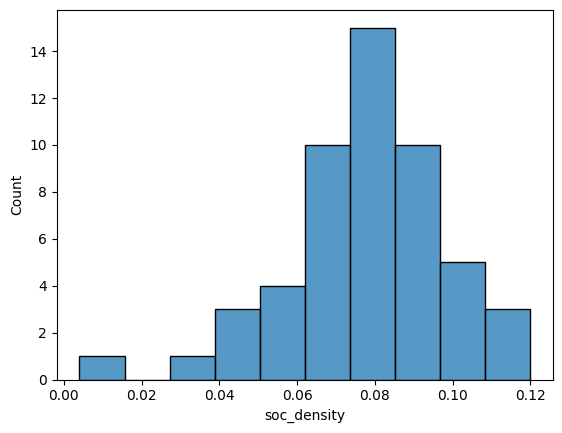

In [5]:
sns.histplot(east['soc_density'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

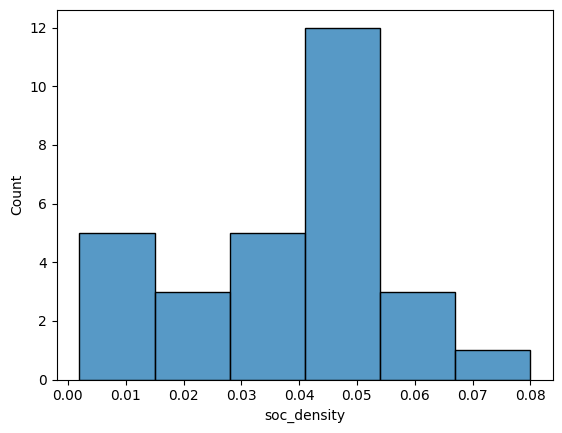

In [6]:
sns.histplot(west['soc_density'])
plt.show

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

The East coast data looks mostly normally distributed although it may be shifted slightly over to the right. Additionally, if you remove the one outlier on the leftside, the data looks very normal. So I would say that the data meets the requirement of being roughly normally distributed. 

The West coast is a little bit worse looking but this seems to mosty be a result of having fewer data points. The data here is still concentrated in the center although the tails are less defined so it is also approximatley normally distributed.

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [7]:
from utils import Linear_Reg_Diagnostic # do not change!

# Find the factors that are most correlated with ocean salinity
sal_corr = df.corr()["ocean_salinity_mean"]
sal_corr = pd.DataFrame(sal_corr)
sal_corr.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdBu")


/var/folders/zz/gs5pj8y10s93_yf9nq6d69gh0000gn/T/ipykernel_67111/1861800185.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sal_corr = df.corr()["ocean_salinity_mean"]


,ocean_salinity_mean
estu_latitude,-0.852660
estu_longintude,0.305917
estu_dep,-0.203900
estu_perim,0.007988
land_area,-0.057248
land_latitude,-0.862551
land_longitude,0.296514
population,-0.046231
tide_ht,-0.454109
estu_salinity,-0.021489


In order, the most highly correlated factors with ocean_salinity_mean are: ocean_diss_inorg_p, land_latitude, estu_latitude, ocean_sst_mean, air_temp_mean, and mean_temp. I will try adding each of these in order as parameters for the regression until my R-squared value stops increasing very much or the VIF values go above 5.

In [8]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols(formula='ocean_salinity_mean ~ ocean_diss_inorg_p',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.836
Model:                             OLS   Adj. R-squared:                  0.835
Method:                  Least Squares   F-statistic:                     571.3
Date:                 Wed, 10 May 2023   Prob (F-statistic):           8.55e-46
Time:                         15:09:04   Log-Likelihood:                -114.27
No. Observations:                  114   AIC:                             232.5
Df Residuals:                      112   BIC:                             238.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             36.4547      0.142    257.163      0.000      36.174      36.736
ocean_diss_inorg_p    -8.4724      0.354    -23.902      0.000      -9.175      -7.770
==============================================================================
Omnibus:                        0.780   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.361
Skew:                           0.014   Prob(JB):                        0.835
Kurtosis:                       3.275   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
diag1 = Linear_Reg_Diagnostic(model1)
print(diag1.vif_table())

             Features  VIF Factor
1  ocean_diss_inorg_p        1.00
0           Intercept        5.18
None


As you can see, this model already has a strong r squared value of 0.836 and no coefficient has a VIF above 5. I will still try a couple of other models with more coefficients.

In [10]:
model2 = smf.ols(formula='ocean_salinity_mean ~ ocean_diss_inorg_p + mean_temp',data=df).fit()
diag2 = Linear_Reg_Diagnostic(model2)


These were the results of when I tested adding the next most highly correlated factors as coefficients to the regression:

ocean_diss_inorg_p + land_latitude: R squared = 0.844, VIF both over 5
ocean_diss_inorg_p + estu_latitude: R squared = 0.838, VIF both over 5
ocean_diss_inorg_p + ocean_sst_mean: R squared = 0.836, VIF both over 5
ocean_diss_inorg_p + air_temp_mean: R squared = 0.836, VIF both over 5
ocean_diss_inorg_p + mean_temp: R squared = 0.836, Adj. R = 0.833, VIF both 4.77

Adding any of the top four most highly correlated terms resulted in VIF values above 5 so these factors should not be included in the model. Adding mean_temp to the regression maintains VIF below 5 but actually slightly lowers the R squared value. So, model 1 is the best linear model for prediciting ocean salinity.

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

The intercept, $\beta_0$ is 36.4547. This is the y-intercept of the linear model. It represents the prediction for ocean salinity when ocean_diss_inorg_p is 0. The regression coefficient, $\beta_1$ , is -8.4724. This is how much the model predicts ocean salinity will change when ocean_diss_inorg_p changes by 1. The R-squared value is 0.836. R-squared is a measure of how much of the variance in the data is explained by the model. The adjusted R-squared value is 0.835. The adjusted R-squared is similar to the regular R-squared but it more accurately measure of how good the mdoel is as more coefficients are added to the model. The p value is 0. The p-value measures the liklihood of getting the coefficient and standard error values we got if the true value were zero.  

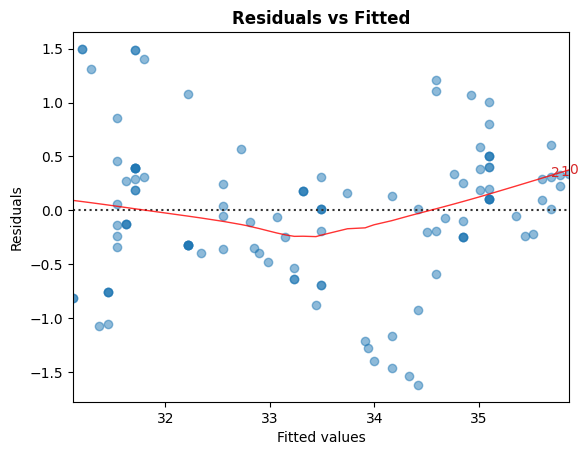

In [11]:
diag1.residual_plot();

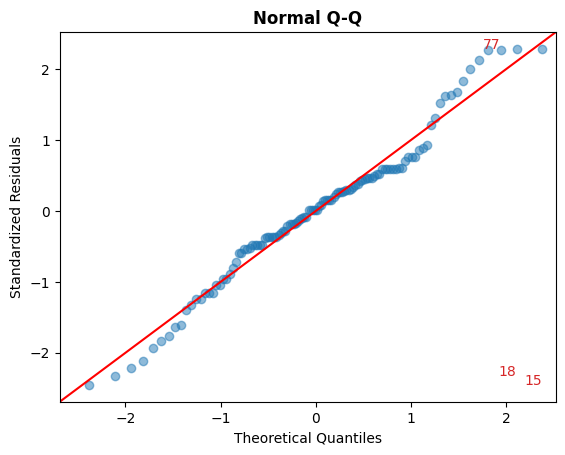

In [12]:
diag1.qq_plot();

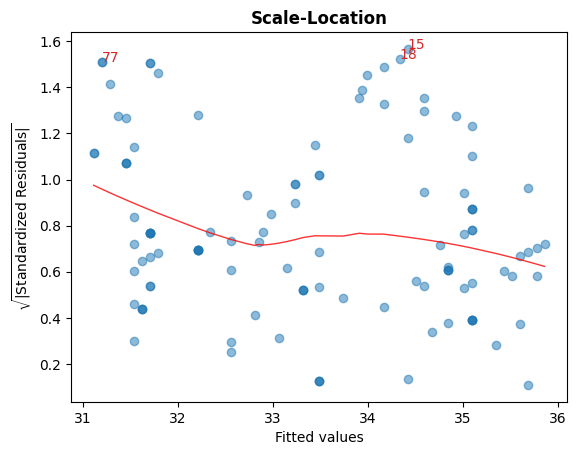

In [13]:

diag1.scale_location_plot();

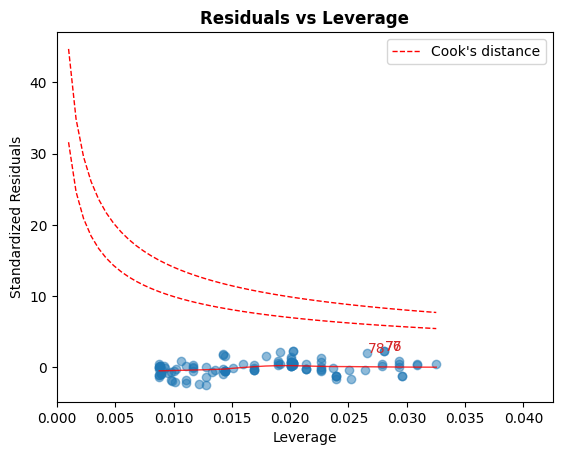

In [14]:
diag1.leverage_plot();

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [15]:
coal = pd.read_csv('data/coal-production.csv')
coal['year'] = pd.to_datetime(coal['year'], format='%Y')
coal = coal.set_index('year').sort_index() # makes sure years are in order
coal.head()

,electricity_prod
year,
1960-01-01,45.904345
1961-01-01,45.730794
1962-01-01,46.411172
1963-01-01,46.599523
1964-01-01,46.102588


Text(0, 0.5, 'Electricity Production')

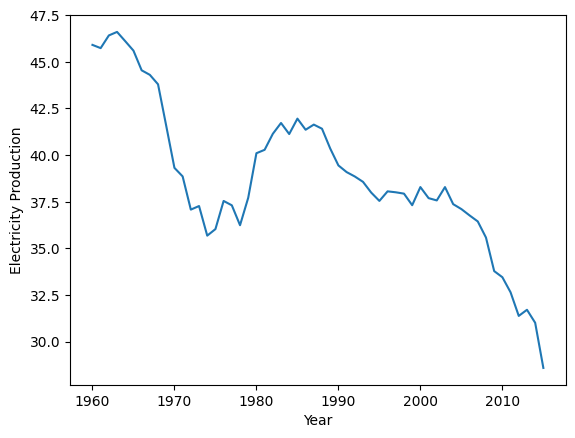

In [16]:
fig, ax = plt.subplots()
ax.plot(coal['electricity_prod']);
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Production')

The data appears to have a downward trend although there are peaks and valleys.

In [17]:
from statsmodels.tsa.stattools import adfuller

# function from class
def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

# print the ADF statistic and the p value. P-values bigger than 0.05 mean that the data is not stationary
adf_print(coal)


ADF Statistic: 1.872154432675808
p-value: 0.9984818799941668


In [19]:
import pmdarima as pm

# run an auto arima
arima_model = pm.auto_arima(coal['electricity_prod'])

# print out the summary
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Wed, 10 May 2023   AIC                            149.368
Time:                        15:15:44   BIC                            155.390
Sample:                    01-01-1960   HQIC                           151.697
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best arima model was a 1,1,1. This means that it has 1 autoregressive term, 1 integration term, and 1 moving average term.

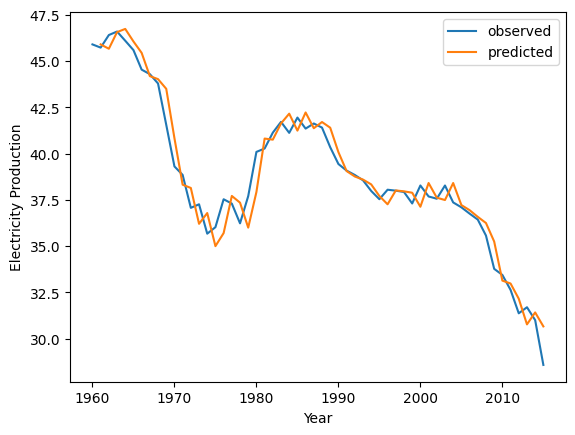

In [24]:
in_samp_pred = arima_model.predict_in_sample()
in_samp_pred = pd.Series(in_samp_pred, index=coal.index)

fig, ax = plt.subplots()
ax.plot(coal, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Production')
ax.legend();

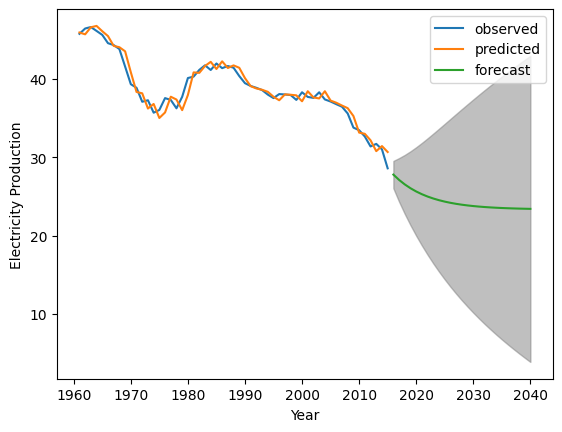

In [25]:
forecast, ci = arima_model.predict(25, return_conf_int=True)
future_dates = pd.date_range(coal.index[-1], periods=26, freq='AS-JAN',inclusive='neither')

fig, ax = plt.subplots()
ax.plot(coal[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(future_dates,forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) # our confidence intervals
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Production')
ax.legend();